In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [4]:
address = "/home/haile/mine/kifiya/repos/Credit-Risk-Probability-Model/Data/"
df = pd.read_csv(address+"raw/data.csv")
print(df.head())
print(df.info())

         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   Amount  Value  TransactionStart

Missing Values & Duplicates

In [5]:
print(df.isnull().sum())
print("Duplicates:", df.duplicated().sum())

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64
Duplicates: 0


Convert Dates & Sort

In [6]:
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
df = df.sort_values(by='TransactionStartTime')

outlier detection using boxplot

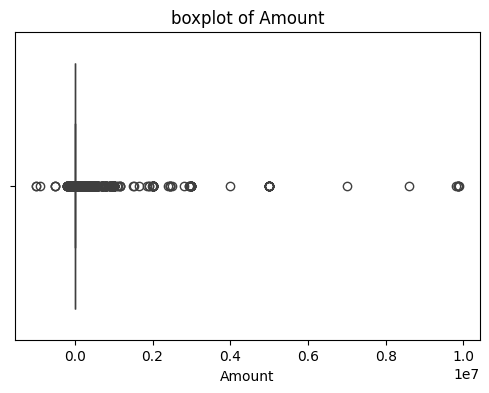

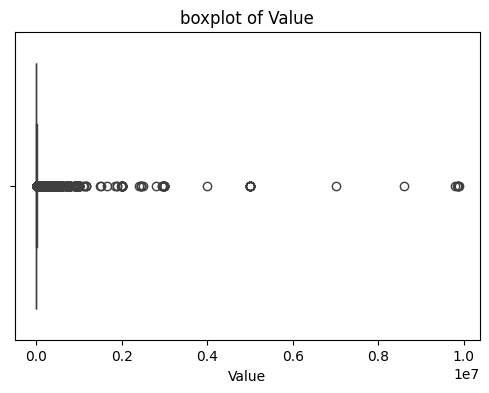

In [7]:
for col in ["Amount", "Value"]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"boxplot of {col}")
    plt.show()

Calculate RFM Features

In [8]:
# Set analysis reference date( the lastest transaction date)
analysis_date = df['TransactionStartTime'].max()

# Group by customer
rfm = df.groupby('CustomerId').agg({
    'TransactionStartTime': lambda x: (analysis_date - x.max()).days,  # Recency
    'CustomerId': 'count',                                        # Frequency
    'Value': 'sum'                                    # Monetary
}).rename(columns={
    'TransactionStartTime': 'Recency',
    'CustomerId': 'Frequency',
    'Value': 'Monetary'
}).reset_index()
rfm


,CustomerId,Recency,Frequency,Monetary
0,CustomerId_1,83,1,10000
1,CustomerId_10,83,1,10000
2,CustomerId_1001,89,5,30400
3,CustomerId_1002,25,11,4775
4,CustomerId_1003,11,6,32000
...,...,...,...,...
3737,CustomerId_992,4,6,32000
3738,CustomerId_993,25,5,32000
3739,CustomerId_994,0,101,614077
3740,CustomerId_996,67,17,151000


30.461250668091928
25.564404061998932
253102.5283270978


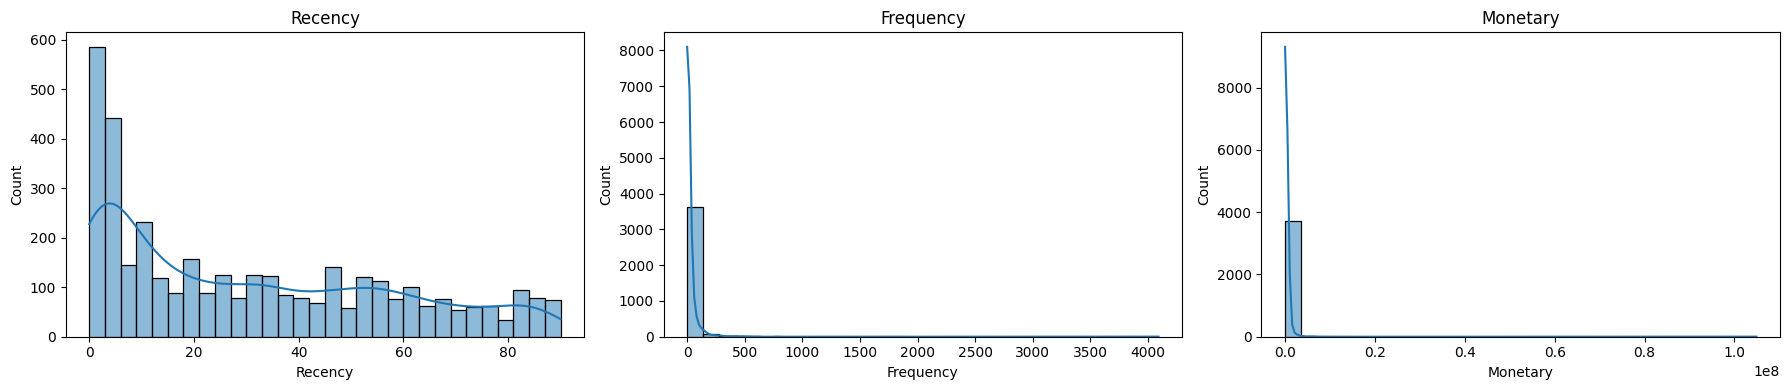

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
print(rfm['Recency'].mean())
print(rfm['Frequency'].mean())
print(rfm['Monetary'].mean())
sns.histplot(rfm['Recency'], bins=30, ax=axes[0], kde=True)
sns.histplot(rfm['Frequency'], bins=30, ax=axes[1], kde=True)
sns.histplot(rfm['Monetary'], bins=30, ax=axes[2], kde=True)
axes[0].set_title('Recency')
axes[1].set_title('Frequency')
axes[2].set_title('Monetary')
plt.tight_layout()

Correlation Analysis

<Axes: >

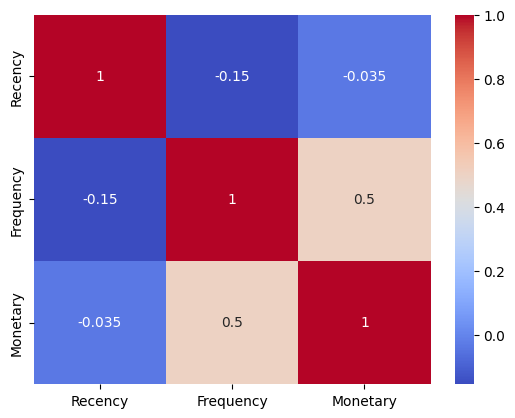

In [10]:
sns.heatmap(rfm[['Recency', 'Frequency', 'Monetary']].corr(), annot=True, cmap="coolwarm")

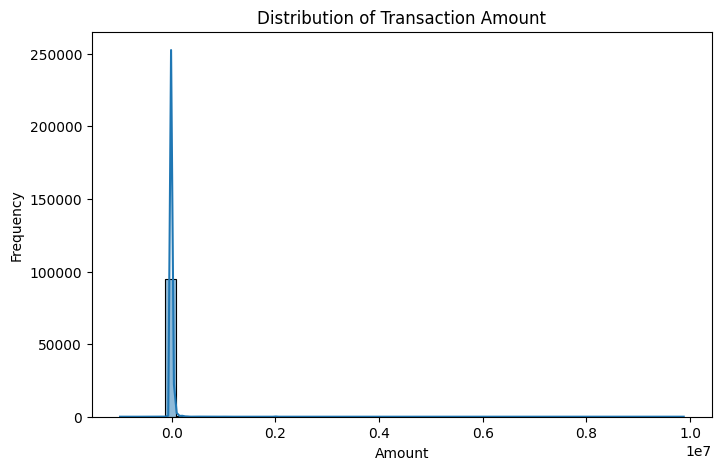

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

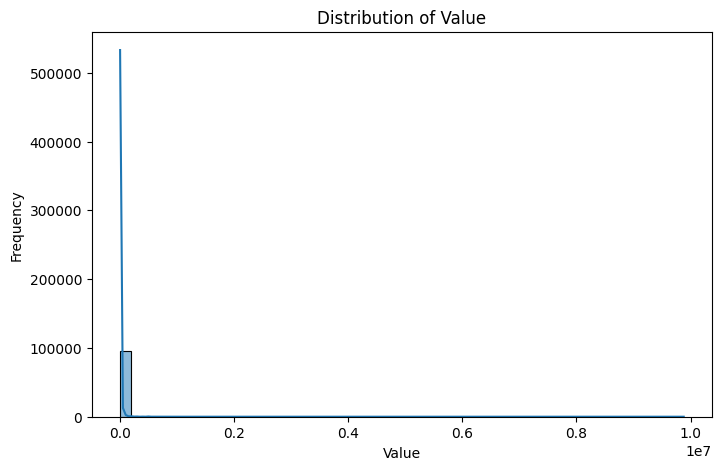

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Value'], bins=50, kde=True)
plt.title('Distribution of Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

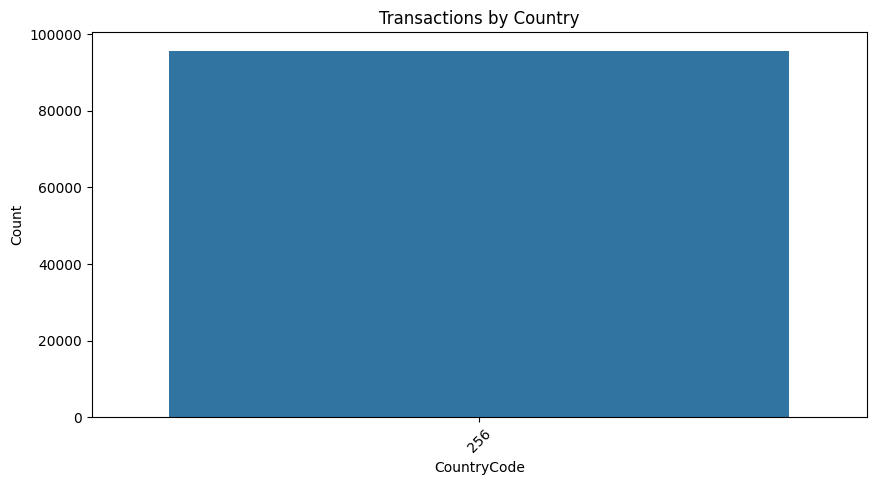

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='CountryCode', order=df['CountryCode'].value_counts().index)
plt.title('Transactions by Country')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

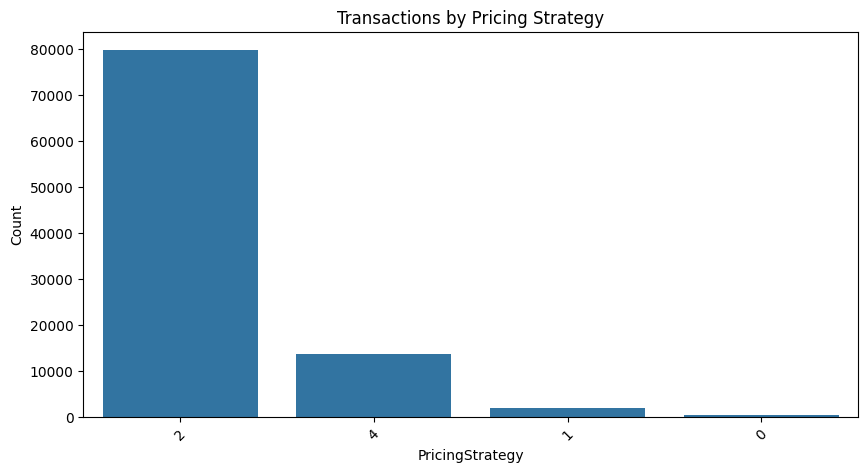

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='PricingStrategy', order=df['PricingStrategy'].value_counts().index)
plt.title('Transactions by Pricing Strategy')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

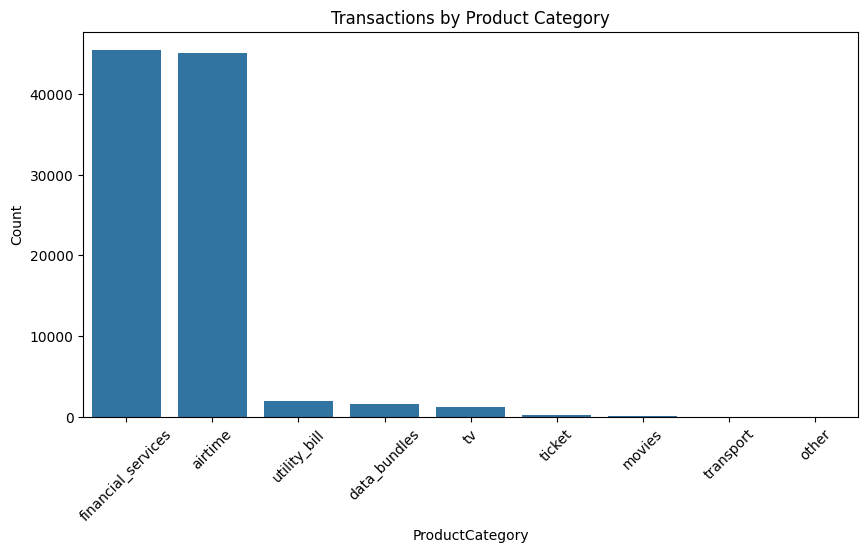

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='ProductCategory', order=df['ProductCategory'].value_counts().index)
plt.title('Transactions by Product Category')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

In [17]:
df.to_csv(address + "processed/eda_processed.csv", index=False)